In [17]:
import pandas as pd
from matplotlib import pyplot as plt

In [18]:
df = pd.read_csv("./data/market/Rice.csv")
df = df[df["Centre_Name"] == "NAGPUR"].drop(columns=["Centre_Name"])

In [19]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date", ascending=True)

In [20]:
date_range = pd.date_range(start=df['Date'].min(), end=df['Date'].max(), freq='D')
date_range

DatetimeIndex(['2010-08-31', '2010-09-01', '2010-09-02', '2010-09-03',
               '2010-09-04', '2010-09-05', '2010-09-06', '2010-09-07',
               '2010-09-08', '2010-09-09',
               ...
               '2015-04-19', '2015-04-20', '2015-04-21', '2015-04-22',
               '2015-04-23', '2015-04-24', '2015-04-25', '2015-04-26',
               '2015-04-27', '2015-04-28'],
              dtype='datetime64[ns]', length=1702, freq='D')

In [21]:
range_df = pd.DataFrame({'Date': date_range})
df = pd.merge(range_df, df, on='Date', how='left')
df

,Date,Price
0,2010-08-31,1817.0
1,2010-09-01,1733.0
2,2010-09-02,NaN
3,2010-09-03,1733.0
4,2010-09-04,NaN
...,...,...
1697,2015-04-24,2217.0
1698,2015-04-25,NaN
1699,2015-04-26,NaN
1700,2015-04-27,2217.0


In [22]:
df['Price'].interpolate(method='linear', inplace=True)

In [23]:
df

,Date,Price
0,2010-08-31,1817.0
1,2010-09-01,1733.0
2,2010-09-02,1733.0
3,2010-09-03,1733.0
4,2010-09-04,1733.0
...,...,...
1697,2015-04-24,2217.0
1698,2015-04-25,2217.0
1699,2015-04-26,2217.0
1700,2015-04-27,2217.0


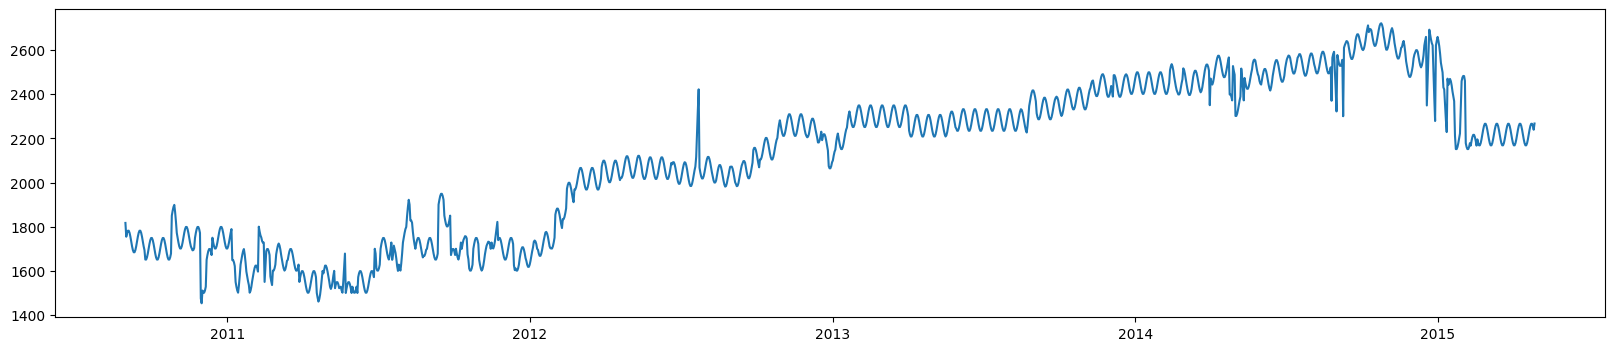

In [93]:
import math

i = 0

def tweak_prices(x):
    global i
    ret = 50 * math.sin(i) + x
    i += math.pi / 7
    return ret

i = 0
plt.figure(figsize=(20, 4))
plt.plot(df["Date"], df["Price"].apply(tweak_prices))

In [94]:
df.to_csv("./data/market/Rice.Nagpur.csv")

In [96]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

X = df.loc[:, ["Date"]]  # features
y = df.loc[:, "Price"]  # target

model = Sequential(
    [
        LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)),
        LSTM(units=50),
        Dense(1),
    ]
)

# model.fit(X, y)

# y_pred = pd.Series(model.predict(X), index=X.index)

2023-12-11 13:43:57.355791: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-11 13:43:57.356710: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [97]:
model.compile()

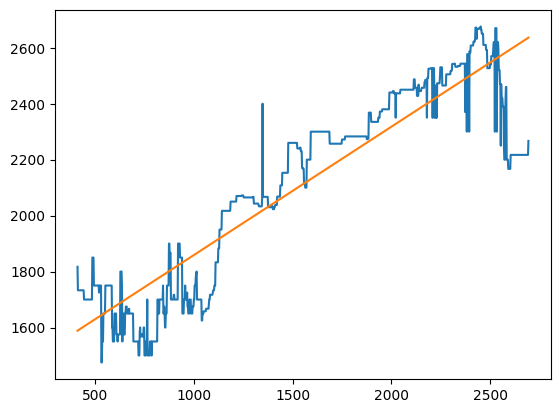

In [68]:
ax = y.plot()
ax = y_pred.plot()